<a href="https://colab.research.google.com/github/ananthakrishna4747/Anantha_krishna_INFO5731_-Spring2024-/blob/main/Assignments/Chilappagari_Anantha_krishna_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [64]:
# Write your code here
import pandas as pd

df = pd.read_csv('/content/output_3_1.csv')


df['Name and Description'] = df['Name']+ ",  " + df['Description']
df['Name and Description']

0      Kay Aiko Abe,  Nisei female. Born May 9, 1927,...
1      Art Abe,  Nisei male. Born June 12, 1921, in S...
2      Sharon Tanagi Aburano,  Nisei female. Born Oct...
3      Toshiko Aiboshi,  Nisei female. Born July 8, 1...
4      Douglas L. Aihara,  Sansei male. Born March 15...
                             ...                        
967    Karen Yoshitomi,  Sansei female. Born 1962 in ...
968    John Young,  Chinese American male. Born May 2...
969    Sharon Yuen,  Sansei female. Born July 1945 in...
970    Lois Yuki,  Nisei female. Born September 13, 1...
971    Aaron Zajic,  Born in Baltimore, Maryland. Dur...
Name: Name and Description, Length: 972, dtype: object

In [65]:
import re
from collections import Counter

def tokenize_text(text):
    # Tokenize text into words
    words = re.findall(r'\w+', str(text).lower())  # Convert to string before processing
    return words

def get_ngrams(text, n):
    # Generate n-grams from text
    words = tokenize_text(text)
    ngrams = [tuple(words[i:i+n]) for i in range(len(words)-n+1)]
    return ngrams

def count_ngrams(texts, n):
    # Count the frequency of n-grams in a list of texts
    ngram_counts = Counter()
    for text in texts:
        ngrams = get_ngrams(text, n)
        ngram_counts.update(ngrams)
    return ngram_counts

def calculate_bigram_probabilities(texts):
    # Calculate probabilities for bigrams
    bigram_counts = count_ngrams(texts, 2)
    unigram_counts = count_ngrams(texts, 1)
    bigram_probabilities = {}
    for bigram, count in bigram_counts.items():
        if bigram[0] in unigram_counts and unigram_counts[bigram[0]] != 0:
            bigram_probabilities[bigram] = count / unigram_counts[bigram[0]]
        else:
            bigram_probabilities[bigram] = 0  # Set probability to 0 if denominator is 0
    return bigram_probabilities


def extract_noun_phrases(texts):
    # Extract noun phrases from texts
    noun_phrases = set()
    for text in texts:
        words = tokenize_text(text)
        for i in range(len(words)-1):
            if words[i+1] == 'noun' and words[i] != 'noun':
                noun_phrases.add(words[i])
    return list(noun_phrases)


def calculate_relative_probabilities(texts):
    # Calculate relative probabilities of noun phrases
    noun_phrases = extract_noun_phrases(texts)
    noun_phrase_counts = Counter()
    for text in texts:
        words = tokenize_text(text)
        for noun_phrase in noun_phrases:
            if noun_phrase in words:
                noun_phrase_counts[noun_phrase] += 1

    if not noun_phrase_counts:  # Check if noun_phrase_counts is empty
        return {}  # Return an empty dictionary if there are no noun phrases

    max_count = max(noun_phrase_counts.values())
    relative_probabilities = {noun_phrase: count / max_count for noun_phrase, count in noun_phrase_counts.items()}
    return relative_probabilities


# Sample data similar to the provided dataset
texts = df['Name and Description'][0:60]

# (1) Count the frequency of all the N-grams (N=3)
trigram_counts = count_ngrams(texts, 3)
print("Trigram Counts:")
print(trigram_counts)

# (2) Calculate the probabilities for all the bigrams in the dataset
bigram_probabilities = calculate_bigram_probabilities(texts)
print("\nBigram Probabilities:")
print(bigram_probabilities)

# (3) Extract all the noun phrases and calculate the relative probabilities
relative_probabilities = calculate_relative_probabilities(texts)
print("\nRelative Probabilities of Noun Phrases:")
print(relative_probabilities)


Trigram Counts:
Counter({('world', 'war', 'ii'): 32, ('during', 'world', 'war'): 26, ('grew', 'up', 'in'): 20, ('nisei', 'female', 'born'): 18, ('removed', 'to', 'the'): 18, ('minidoka', 'concentration', 'camp'): 18, ('concentration', 'camp', 'idaho'): 17, ('nisei', 'male', 'born'): 14, ('in', 'seattle', 'washington'): 13, ('assembly', 'center', 'california'): 12, ('after', 'leaving', 'camp'): 12, ('war', 'ii', 'removed'): 11, ('the', 'bombing', 'of'): 11, ('bombing', 'of', 'pearl'): 11, ('of', 'pearl', 'harbor'): 11, ('ii', 'removed', 'to'): 10, ('center', 'california', 'and'): 10, ('california', 'grew', 'up'): 10, ('the', 'minidoka', 'concentration'): 9, ('puyallup', 'assembly', 'center'): 9, ('in', 'los', 'angeles'): 9, ('after', 'the', 'war'): 8, ('assembly', 'center', 'washington'): 8, ('california', 'and', 'the'): 8, ('and', 'the', 'minidoka'): 7, ('the', 'puyallup', 'assembly'): 7, ('center', 'washington', 'and'): 7, ('one', 'of', 'the'): 7, ('the', 'united', 'states'): 7, ('con

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [66]:
# Write your code here
import math

# Sample documents
documents = df['Name and Description'][0:100]
# Sample query
# query = "Michiko Frances Chikahisa, a Nisei female, born in 1929 in Los Angeles, California, experienced relocation during WWII to Arkansas. She later earned a master's in social work and practiced in Los Angeles and Chicago."
query = "An Outstanding movie with a haunting performance and best character development"
def tokenize_text(text):
    # Tokenize text into words
    words = str(text).lower().split()
    return words


def calculate_tf(text):
    # Calculate term frequency (TF) for each term in the text
    words = tokenize_text(text)
    tf_dict = {}
    total_words = len(words)
    for word in words:
        tf_dict[word] = tf_dict.get(word, 0) + 1 / total_words
    return tf_dict

def calculate_idf(documents):
    # Calculate inverse document frequency (IDF) for each term in the documents
    idf_dict = {}
    total_documents = len(documents)
    for document in documents:
        words_set = set(tokenize_text(document))
        for word in words_set:
            idf_dict[word] = idf_dict.get(word, 0) + 1
    for word, freq in idf_dict.items():
        idf_dict[word] = math.log10(total_documents / freq)
    return idf_dict

def build_tf_idf_matrix(documents):
    # Build the TF-IDF matrix for the documents
    tf_idf_matrix = []
    idf_dict = calculate_idf(documents)
    for document in documents:
        tf_dict = calculate_tf(document)
        tf_idf_vector = [tf_dict[word] * idf_dict[word] for word in tf_dict]
        tf_idf_matrix.append(tf_idf_vector)
    return tf_idf_matrix

def calculate_cosine_similarity(query_vector, document_vector):
    # Calculate cosine similarity between query vector and document vector
    dot_product = sum(q * d for q, d in zip(query_vector, document_vector))
    query_norm = math.sqrt(sum(q ** 2 for q in query_vector))
    document_norm = math.sqrt(sum(d ** 2 for d in document_vector))
    cosine_similarity = dot_product / (query_norm * document_norm)
    return cosine_similarity

def rank_documents(documents, query):
    # Rank documents based on cosine similarity to the query
    query_vector = build_query_vector(query)
    tf_idf_matrix = build_tf_idf_matrix(documents)
    similarity_scores = []
    for doc_vector in tf_idf_matrix:
        similarity_scores.append(calculate_cosine_similarity(query_vector, doc_vector))
    ranked_documents = sorted(zip(documents, similarity_scores), key=lambda x: x[1], reverse=True)
    return ranked_documents

def build_query_vector(query):
    # Build the TF-IDF vector for the query
    query_tf = calculate_tf(query)
    idf_dict = calculate_idf(documents)
    query_vector = [query_tf[word] * idf_dict[word] if word in query_tf else 0 for word in idf_dict]
    return query_vector

# Calculate TF-IDF matrix for documents
tf_idf_matrix = build_tf_idf_matrix(documents)
print("TF-IDF Matrix for Documents:")
for i, vector in enumerate(tf_idf_matrix):
    print(f"Doc {i+1}: {vector}")


TF-IDF Matrix for Documents:
Doc 1: [0.02498485300494145, 0.029411764705882353, 0.02498485300494145, 0.0035900756518751262, 0.005694355048239183, 0.0008164312919092855, 0.016983852352731515, 0.02498485300494145, 0.022395275665887317, 0.0015975958524019722, 0.029411764705882353, 0.01934050938758217, 0.019132794053882077, 0.02498485300494145, 0.00305306338973156, 0.017968363964946416, 0.029411764705882353, 0.029411764705882353, 0.0058520589510593765, 0.00996736331273648, 0.019132794053882077, 0.0049262084498165794, 0.013541452264005518, 0.02498485300494145, 0.007689393312946141, 0.01131692762679009, 0.019132794053882077, 0.016983852352731515, 0.013541452264005518, 0.02498485300494145, 0.029411764705882353, 0.004760112213172125, 0.029411764705882353, 0.0035900756518751262, 0.003935385884956346, 0.003479000094662686, 0.006013755779022071, 0.005390169770888433, 0.0005161131945591266, 0.015378786625892283, 0.005694355048239183, 0.006013755779022071, 0.0008894227556085508, 0.00938635535268245

In [67]:
# Rank documents based on cosine similarity to the query
ranked_documents = rank_documents(documents, query)
print("\nRanked Based on Cosine Similarity of Query:")
for i, (doc, score) in enumerate(ranked_documents):
    print(f"Rank {i+1}:, Cosine Similarity Score: {score:.4f}")


Ranked Based on Cosine Similarity of Query:
Rank 1:, Cosine Similarity Score: 0.1034
Rank 2:, Cosine Similarity Score: 0.0752
Rank 3:, Cosine Similarity Score: 0.0717
Rank 4:, Cosine Similarity Score: 0.0616
Rank 5:, Cosine Similarity Score: 0.0569
Rank 6:, Cosine Similarity Score: 0.0465
Rank 7:, Cosine Similarity Score: 0.0425
Rank 8:, Cosine Similarity Score: 0.0379
Rank 9:, Cosine Similarity Score: 0.0373
Rank 10:, Cosine Similarity Score: 0.0371
Rank 11:, Cosine Similarity Score: 0.0332
Rank 12:, Cosine Similarity Score: 0.0310
Rank 13:, Cosine Similarity Score: 0.0304
Rank 14:, Cosine Similarity Score: 0.0285
Rank 15:, Cosine Similarity Score: 0.0284
Rank 16:, Cosine Similarity Score: 0.0284
Rank 17:, Cosine Similarity Score: 0.0265
Rank 18:, Cosine Similarity Score: 0.0264
Rank 19:, Cosine Similarity Score: 0.0256
Rank 20:, Cosine Similarity Score: 0.0256
Rank 21:, Cosine Similarity Score: 0.0252
Rank 22:, Cosine Similarity Score: 0.0248
Rank 23:, Cosine Similarity Score: 0.024

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [68]:
# Write your code here

!pip install gensim


'word' not in vocabulary
Word2Vec<vocab=219, vector_size=300, alpha=0.025>


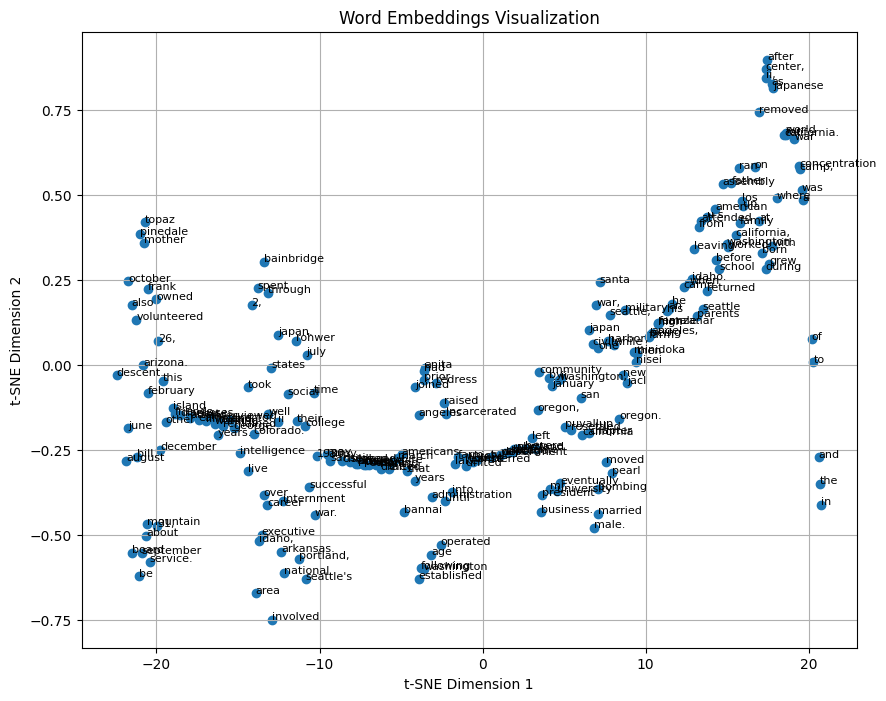

In [69]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample text data (you can replace this with your own dataset)
sentences = [str(text).lower().split() for text in df['Name and Description'][0:100]]

# Train Word2Vec model with 300 dimensions
model = Word2Vec(sentences, vector_size=300)

# Check the vector for a specific word
word_to_check = 'word'
if word_to_check in model.wv.key_to_index:
    vector = model.wv[word_to_check]
    print(f"Vector for '{word_to_check}': {vector}")
else:
    print(f"'{word_to_check}' not in vocabulary")

# Save the Word2Vec model
model.save('model.bin')

# Load the saved model
new_model = Word2Vec.load('model.bin')
print(new_model)

# Get vectors for all words in the vocabulary
X = np.array([model.wv.get_vector(word) for word in model.wv.index_to_key])

# Perform PCA for dimensionality reduction to 50 dimensions
pca = PCA(n_components=50)
result_pca = pca.fit_transform(X)

# Perform t-SNE for further dimensionality reduction to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
result_tsne = tsne.fit_transform(result_pca)

# Plot the t-SNE visualization
plt.figure(figsize=(10, 8))
plt.scatter(result_tsne[:, 0], result_tsne[:, 1], marker='o')

# Annotate words on the plot
words = list(model.wv.index_to_key)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result_tsne[i, 0], result_tsne[i, 1]), fontsize=8)

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Word Embeddings Visualization')
plt.grid(True)
plt.show()


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [71]:
# The GitHub link of your final csv file
#https://github.com/ananthakrishna4747/Anantha_krishna_INFO5731_-Spring2024-/blob/main/Sentiment_Analysis_3_1

# Link:



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [72]:
""" This assignment helps me in understanding how to embed words,  find bigrams and trigrams. I've also learnt the tf-idf matrix scoring. Although i lack something as i didn't master this concept, it's a good start to learn and dvelve deep int these topics.
 I enjoyed Plotting word embeddings, finding cosine similarity for different queries i tested. It' a fun to manually classify the sentiments of my dataset but time taking at the same time.
 Challenging in terms of learning too
"""

" This assignment helps me in understanding how to embed words,  find bigrams and trigrams. I've also learnt the tf-idf matrix scoring. Although i lack something as i didn't master this concept, it's a good start to learn and dvelve deep int these topics. \n I enjoyed Plotting word embeddings, finding cosine similarity for different queries i tested. It' a fun to manually classify the sentiments of my dataset but time taking at the same time.\n Challenging in terms of learning too\n"